<a href="https://colab.research.google.com/github/Krahjotdaan/MachineLearning/blob/main/keras_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras as k
from keras import Sequential
from keras.layers import Dense

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


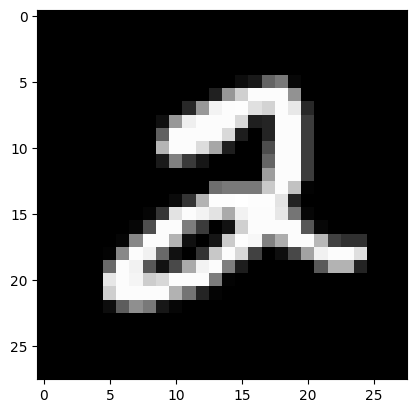

In [ ]:
plt.imshow(X_train[5], cmap='gray')
plt.show()

In [ ]:
X_train, X_test = X_train.reshape(60000, 784) / 255, X_test.reshape(10000, 784) / 255

In [ ]:
y_train, y_test = pd.get_dummies(y_train.astype(str)), pd.get_dummies(y_test.astype(str))

In [ ]:
y_train[:10]

,0,1,2,3,4,5,6,7,8,9
0,False,False,False,False,False,True,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True
5,False,False,True,False,False,False,False,False,False,False
6,False,True,False,False,False,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False,False,False


In [ ]:
X_train.shape

(60000, 784)

**Построение базовой модели MLP**

In [ ]:
classes = 10
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(784, )))
model.add(Dense(classes, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Компиляция**

In [ ]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

**Обучение**

In [ ]:
history = model.fit(x=X_train, y=y_train, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8619 - accuracy: 0.7555 - val_loss: 0.4280 - val_accuracy: 0.8813
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3993 - accuracy: 0.8900 - val_loss: 0.3490 - val_accuracy: 0.9002
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3489 - accuracy: 0.9011 - val_loss: 0.3196 - val_accuracy: 0.9085


**Обобщение**

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(784, )))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=X_train, y=y_train, epochs=20, batch_size=256, validation_data=(X_test, y_test))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
235/235 [==============================] - 1s 5ms/step - loss: 1.9704 - accuracy: 0.3013 - val_loss: 1.6677 - val_accuracy: 0.4561
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 1.3870 - accuracy: 0.6211 - val_loss: 1.0966 - val_accuracy: 0.7563
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.9456 - accuracy: 0.7784 - val_loss: 0.7983 - val_accurac

**Визуализация**

In [ ]:
history.history['accuracy']

[0.30133333802223206,
 0.6211000084877014,
 0.7784166932106018,
 0.8088833093643188,
 0.8241999745368958,
 0.8347333073616028,
 0.8434500098228455,
 0.8506500124931335,
 0.856166660785675,
 0.8608499765396118,
 0.8659999966621399,
 0.8695999979972839,
 0.873033344745636,
 0.8759833574295044,
 0.8789833188056946,
 0.8825333118438721,
 0.885116696357727,
 0.8876333236694336,
 0.8899000287055969,
 0.8915833234786987]

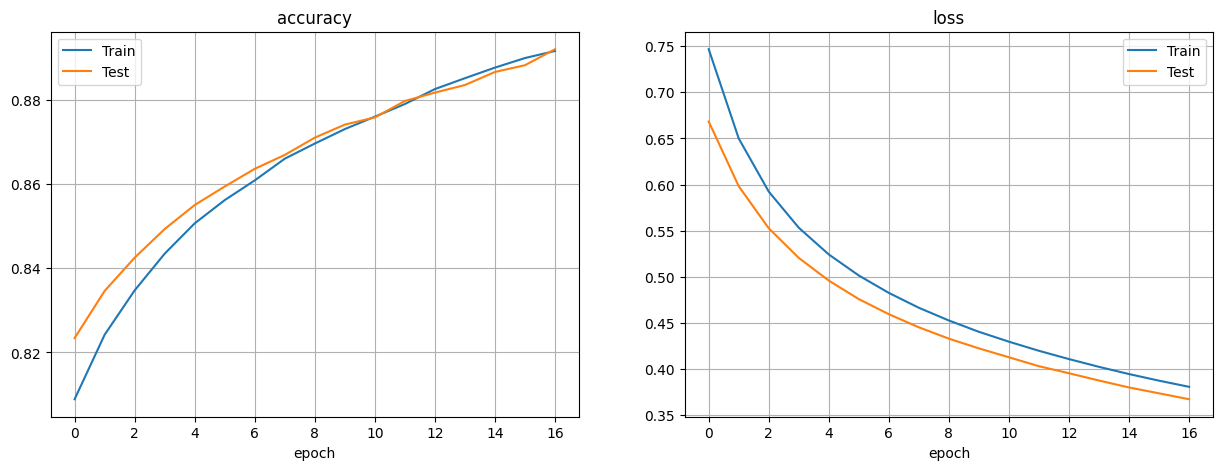

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(history.history['accuracy'][3:], label='Train')
axes[0].plot(history.history['val_accuracy'][3:], label='Test')
axes[0].set_title('accuracy')
axes[0].set_xlabel('epoch')
axes[0].grid()
axes[0].legend()

axes[1].plot(history.history['loss'][3:], label='Train')
axes[1].plot(history.history['val_loss'][3:], label='Test')
axes[1].set_title('loss')
axes[1].set_xlabel('epoch')
axes[1].grid()
axes[1].legend();

In [ ]:
y_pred = model.predict(X_test)

313/313 [==============================] - 2s 4ms/step


In [ ]:
print('вероятности:', np.round(y_pred[0], 3))
print('цифра:', np.argmax(y_pred[0]))

вероятности: [0.001 0.    0.    0.001 0.    0.    0.    0.995 0.    0.003]
цифра: 7


In [ ]:
model.save_weights('my_model')

In [ ]:
model.load_weights('my_model')

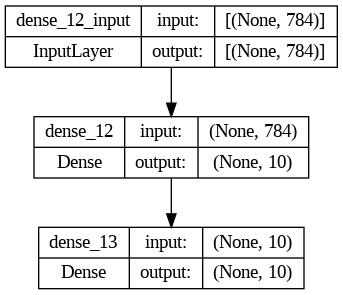

In [ ]:
k.utils.plot_model(model, show_shapes=True)

In [ ]:
# дообучение
history = model.fit(x=X_train, y=y_train, epochs=20, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3749 - accuracy: 0.8935 - val_loss: 0.3622 - val_accuracy: 0.8938
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3695 - accuracy: 0.8951 - val_loss: 0.3568 - val_accuracy: 0.8951
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3643 - accuracy: 0.8967 - val_loss: 0.3526 - val_accuracy: 0.8973
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3597 - accuracy: 0.8981 - val_loss: 0.3484 - val_accuracy: 0.8966
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3553 - accuracy: 0.8995 - val_loss: 0.3446 - val_accuracy: 0.8984
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3512 - accuracy: 0.9004 - val_loss: 0.3404 - val_accuracy: 0.8996
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.3475 - accuracy: 0.9018 - val_loss: 0.3374 - val_accuracy: 0.9003
Epoch 

**Улучшение точности**

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784, )))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=X_train, y=y_train, epochs=20, batch_size=256, validation_data=(X_test, y_test))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 512)               401920    
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dense_21 (Dense)            (None, 10)                650       
                                                                 
Total params: 575050 (2.19 MB)
Trainable params: 575050 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
235/235

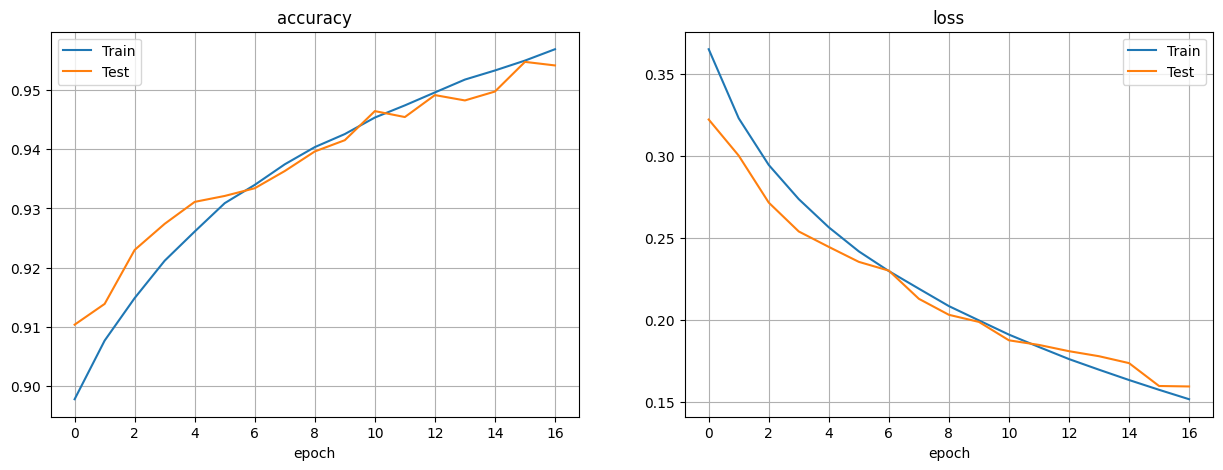

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(history.history['accuracy'][3:], label='Train')
axes[0].plot(history.history['val_accuracy'][3:], label='Test')
axes[0].set_title('accuracy')
axes[0].set_xlabel('epoch')
axes[0].grid()
axes[0].legend()

axes[1].plot(history.history['loss'][3:], label='Train')
axes[1].plot(history.history['val_loss'][3:], label='Test')
axes[1].set_title('loss')
axes[1].set_xlabel('epoch')
axes[1].grid()
axes[1].legend();

In [ ]:
# изменение функции активации
model = Sequential()
model.add(Dense(512, activation='elu', input_shape=(784, )))
model.add(Dense(256, activation='elu'))
model.add(Dense(128, activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=X_train, y=y_train, epochs=20, batch_size=256, validation_data=(X_test, y_test))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 512)               401920    
                                                                 
 dense_28 (Dense)            (None, 256)               131328    
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 10)                650       
                                                                 
Total params: 575050 (2.19 MB)
Trainable params: 575050 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
235/23

In [ ]:
# изменение оптимизатора
model = Sequential()
model.add(Dense(512, activation='elu', input_shape=(784, )))
model.add(Dense(256, activation='elu'))
model.add(Dense(128, activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=X_train, y=y_train, epochs=20, batch_size=256, validation_data=(X_test, y_test))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 512)               401920    
                                                                 
 dense_33 (Dense)            (None, 256)               131328    
                                                                 
 dense_34 (Dense)            (None, 128)               32896     
                                                                 
 dense_35 (Dense)            (None, 64)                8256      
                                                                 
 dense_36 (Dense)            (None, 10)                650       
                                                                 
Total params: 575050 (2.19 MB)
Trainable params: 575050 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
235/23

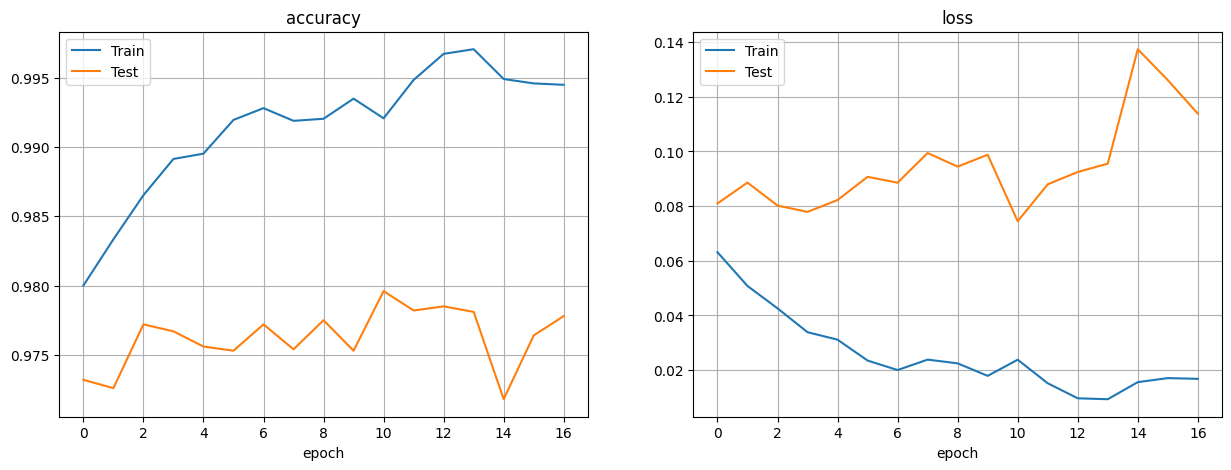

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(history.history['accuracy'][3:], label='Train')
axes[0].plot(history.history['val_accuracy'][3:], label='Test')
axes[0].set_title('accuracy')
axes[0].set_xlabel('epoch')
axes[0].grid()
axes[0].legend()

axes[1].plot(history.history['loss'][3:], label='Train')
axes[1].plot(history.history['val_loss'][3:], label='Test')
axes[1].set_title('loss')
axes[1].set_xlabel('epoch')
axes[1].grid()
axes[1].legend();

**Борьба с переобучением**

In [ ]:
from keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(512, activation='elu', input_shape=(784, )))
model.add(Dropout(0.3))
model.add(Dense(256, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='elu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=X_train, y=y_train, epochs=20, batch_size=256, validation_data=(X_test, y_test))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_38 (Dense)            (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_39 (Dense)            (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_40 (Dense)            (None, 64)              

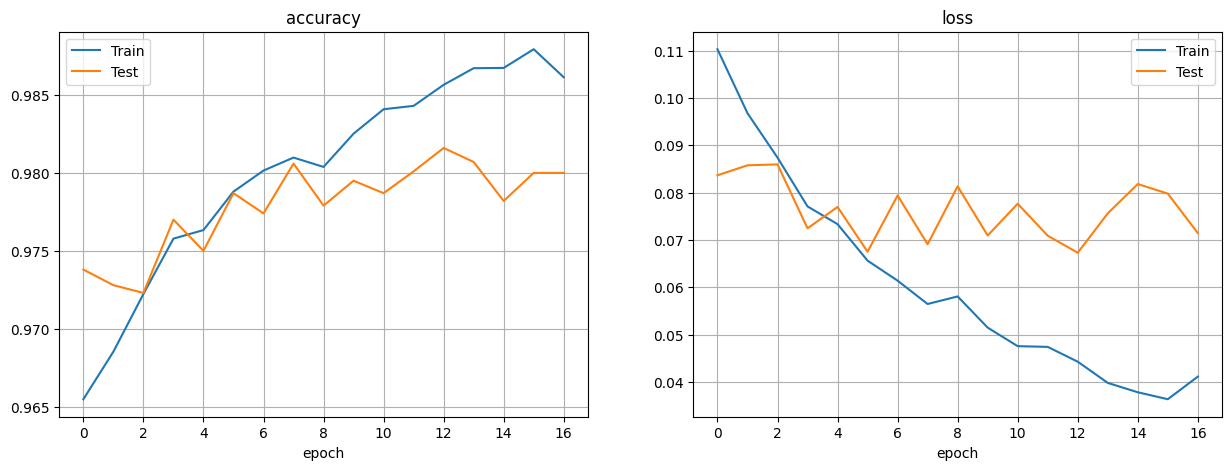

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(history.history['accuracy'][3:], label='Train')
axes[0].plot(history.history['val_accuracy'][3:], label='Test')
axes[0].set_title('accuracy')
axes[0].set_xlabel('epoch')
axes[0].grid()
axes[0].legend()

axes[1].plot(history.history['loss'][3:], label='Train')
axes[1].plot(history.history['val_loss'][3:], label='Test')
axes[1].set_title('loss')
axes[1].set_xlabel('epoch')
axes[1].grid()
axes[1].legend();